In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.dates as mdates

In [2]:
cwd = os.getcwd()
ri_reg = xr.open_dataset(os.path.join(cwd, 'timing', 'timing.1hr_1948-09-01-00000.nc'))
ri_20 = xr.open_dataset(os.path.join(cwd, 'timing', 'timing.20min_1948-09-01-00000.nc'))
rbr = xr.open_dataset(os.path.join(cwd, 'timing', 'timing.1979-09-01-00000.nc'))
image = xr.open_dataset(os.path.join(cwd, 'timing', 'timing.imagemode_1948-09-01-00000.nc'))
ri_3hr = xr.open_dataset(os.path.join(cwd, 'timing', 'timing.3hrly_1948-09-01-00000.nc'))
mpirank_timing = xr.open_dataset(os.path.join(cwd, 'timing', 'timing.mpirank_1948-09-01-00000.nc'))

In [3]:
vars = ['OUT_TIME_VICRUN_WALL', 'OUT_TIME_VICRUN_CPU', 'OUT_SNOWT_FBFLAG', 'OUT_SURFT_FBFLAG', 
        'OUT_TCAN_FBFLAG', 'OUT_TFOL_FBFLAG']

Mean run time, RI hourly vs RBR

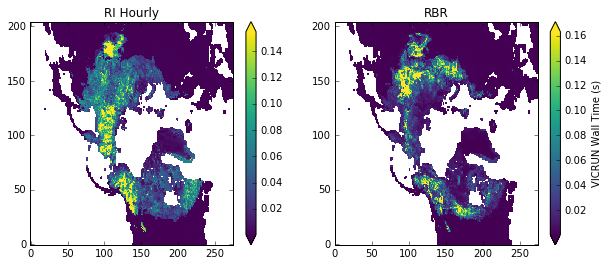

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
kwargs={'cbar_label': 'VIC Run Time (s)'}
(ri_reg[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              )
axes[0].set_title("RI Hourly")
(rbr[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})
axes[1].set_title("RBR")

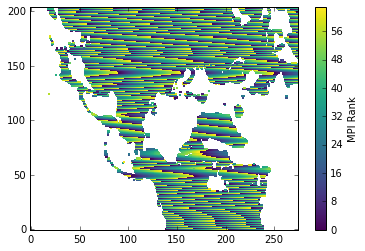

In [6]:
mpirank_timing['OUT_MPI_RANK'].isel(time=0).plot(add_labels=False, cbar_kwargs={'label': 'MPI Rank'})
plt.title('')

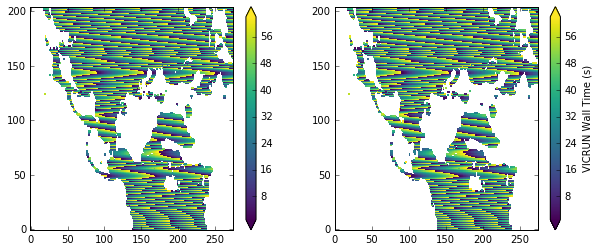

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
kwargs={'cbar_label': 'VIC Run Time (s)'}
mpirank_timing['OUT_MPI_RANK'].isel(time=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              )

mpirank_timing['OUT_MPI_RANK'].isel(time=100).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})


Max runtime per gridcell run time, RI hourly vs RBR

[None, None, None, None, None, None, None]

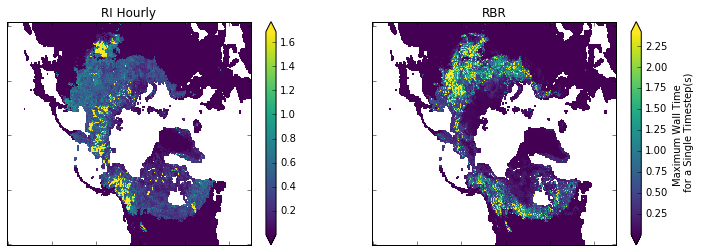

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
var = 'OUT_TIME_VICRUN_WALL'
kwargs={'cbar_label': 'VIC Run Time (s)'}
(ri_reg[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              )
plt.setp(axes[0].get_xticklabels(), visible=False)
plt.setp(axes[0].get_yticklabels(), visible=False)
axes[0].set_title("RI Hourly")
(rbr[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Maximum Wall Time \n for a Single Timestep(s)'})
axes[1].set_title("RBR")
plt.setp(axes[1].get_xticklabels(), visible=False)
plt.setp(axes[1].get_yticklabels(), visible=False)

Maximum run time, RI hourly vs Image Mode (colorbars constrained with `robust=True`)

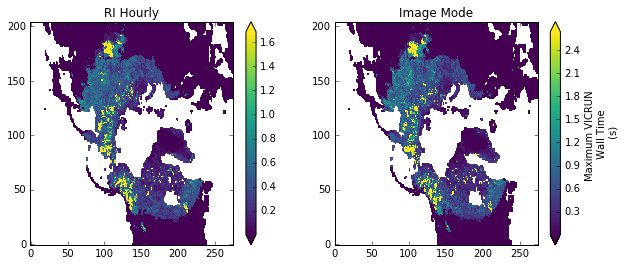

In [9]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
kwargs={'cbar_label': 'VIC Run Time (s)'}
(ri_reg[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              )
axes[0].set_title("RI Hourly")
(image[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Maximum VICRUN \n Wall Time \n (s)'})
axes[1].set_title("Image Mode")

Maximum run time, RI hourly vs Image Mode (colorbars NOT constrained with `robust=True`)

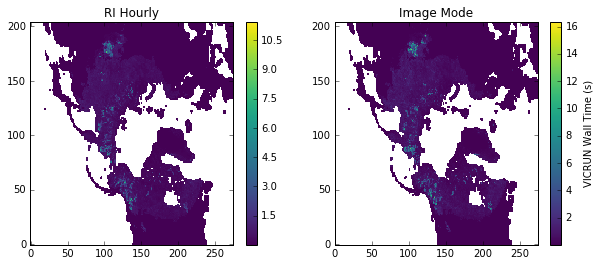

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
kwargs={'cbar_label': 'VIC Run Time (s)'}
(ri_reg[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              )
axes[0].set_title("RI Hourly")
(image[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})
axes[1].set_title("Image Mode")

Maximum run time over all gridcells and timesteps, RI hourly

In [12]:
(ri_reg[var]/np.timedelta64(1,'s')).max()

<xarray.DataArray 'OUT_TIME_VICRUN_WALL' ()>
array(11.458153)

figure out which gridcell this max run time is occurring in and get the nj, ni indices 

In [38]:
max_runtime = (ri_reg[var]/np.timedelta64(1,'s')).max().values
times = (ri_reg[var]/np.timedelta64(1,'s'))
arr_times = times.values
timestep_ind, nj_ind, ni_ind = np.where(arr_times == max_runtime)


check that using these indices is equal to max_runtime 

In [41]:
print(times.values[timestep_ind, nj_ind, ni_ind])
print(max_runtime)
print("nj ind is %.0f" %nj_ind)
print("ni ind is %.0f" %ni_ind)

[ 11.458153]
11.458153
nj ind is 39
ni ind is 134


Maximum run time over all gridcells and timesteps, RBR 

In [7]:
(rbr[var]/np.timedelta64(1,'s')).max()

<xarray.DataArray 'OUT_TIME_VICRUN_WALL' ()>
array(13.680247)

Max run time for each timestep over all gridcells, RI hourly

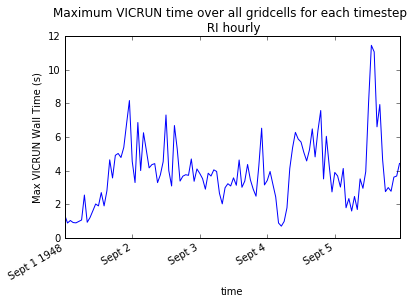

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))
((ri_reg[var]/np.timedelta64(1,'s')).max(dim=['nj', 'ni'])).plot()
axes.set_title('Maximum VICRUN time over all gridcells for each timestep \n RI hourly')
axes.xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes.set_xticklabels(['Sept 1 1948', 'Sept 2', 'Sept 3', 'Sept 4', 'Sept 5'])
axes.set_ylabel('Max VICRUN Wall Time (s)')

Max run time for each timestep over all gridcells, RBR

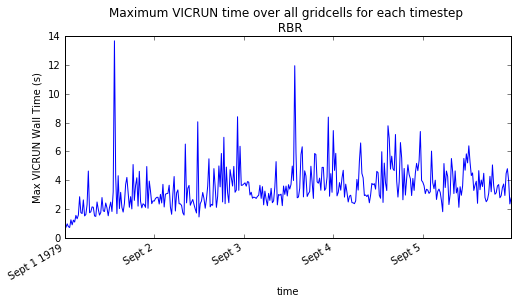

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))
((rbr[var]/np.timedelta64(1,'s')).max(dim=['nj', 'ni'])).plot()
axes.set_title('Maximum VICRUN time over all gridcells for each timestep \n RBR')
axes.xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes.set_xticklabels(['Sept 1 1979', 'Sept 2', 'Sept 3', 'Sept 4', 'Sept 5'])
axes.set_ylabel('Max VICRUN Wall Time (s)')

Total run time for each gridcell over all timesteps, RI hourly and RBR

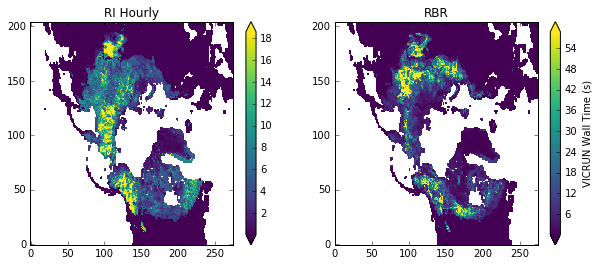

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
kwargs={'cbar_label': 'VIC Run Time (s)'}
(ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0).where((ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              )
axes[0].set_title("RI Hourly")
(rbr[var]/np.timedelta64(1,'s')).sum(axis=0).where((rbr[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})
axes[1].set_title("RBR")

Mean run time over all timesteps, RI hourly and RI 20 min

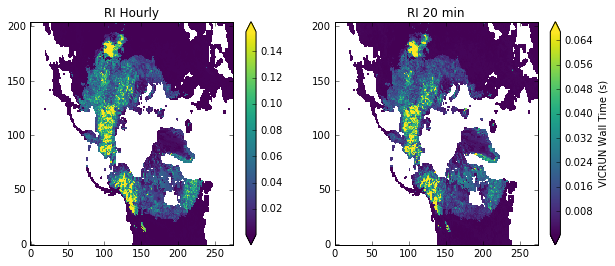

In [11]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
(ri_reg[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True)
axes[0].set_title("RI Hourly")
(ri_20[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})
axes[1].set_title("RI 20 min")

Total run time for each gridcell over all timesteps, RI hourly and RI 20 min

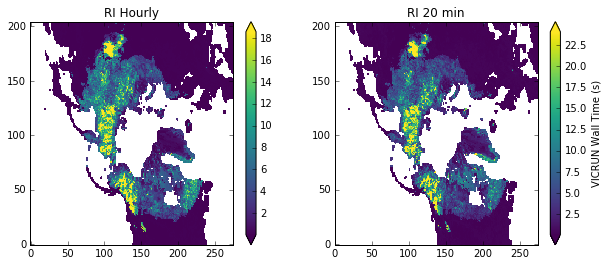

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
(ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0).where((ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True)
axes[0].set_title("RI Hourly")
(ri_20[var]/np.timedelta64(1,'s')).sum(axis=0).where((ri_20[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})
axes[1].set_title("RI 20 min")

Total run time for each gridcell over all timesteps, RBR and RI 20 min

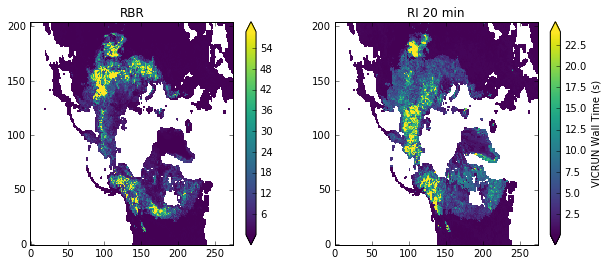

In [13]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
var = 'OUT_TIME_VICRUN_WALL'
(rbr[var]/np.timedelta64(1,'s')).sum(axis=0).where((rbr[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True)
axes[0].set_title("RBR")

(ri_20[var]/np.timedelta64(1,'s')).sum(axis=0).where((ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              cbar_kwargs={'label':'VICRUN Wall Time (s)'})
axes[1].set_title("RI 20 min")

Mean, total and max run times for each gridcell, RBR case

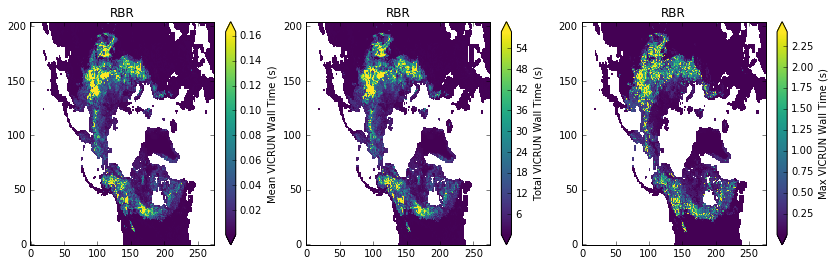

In [14]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
(rbr[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Mean VICRUN Wall Time (s)'})
axes[0].set_title("RBR")
(rbr[var]/np.timedelta64(1,'s')).sum(axis=0).where((rbr[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              cbar_kwargs={'label':'Total VICRUN Wall Time (s)'})
axes[1].set_title("RBR")
(rbr[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[2], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Max VICRUN Wall Time (s)'})
axes[2].set_title("RBR")


Mean, total and max run times for each gridcell, RI hourly case

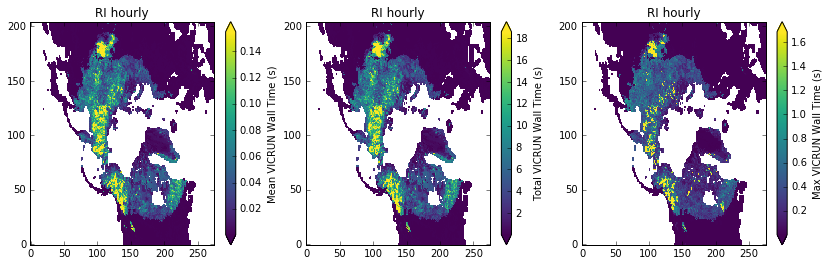

In [15]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
(ri_reg[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Mean VICRUN Wall Time (s)'})
axes[0].set_title("RI hourly")
(ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0).where((ri_reg[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              cbar_kwargs={'label':'Total VICRUN Wall Time (s)'})
axes[1].set_title("RI hourly")
(ri_reg[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[2], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Max VICRUN Wall Time (s)'})
axes[2].set_title("RI hourly")

Mean, total and max run times for each gridcell, RI 20 min

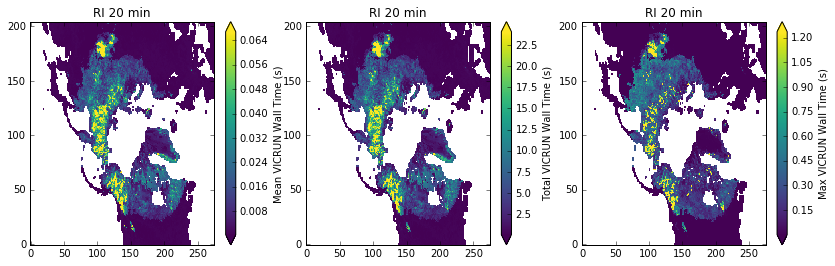

In [16]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
(ri_20[var]/np.timedelta64(1,'s')).mean(axis=0).plot(ax=axes[0], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Mean VICRUN Wall Time (s)'})
axes[0].set_title("RI 20 min")
(ri_20[var]/np.timedelta64(1,'s')).sum(axis=0).where((ri_20[var]/np.timedelta64(1,'s')).sum(axis=0) > 0).plot(ax=axes[1], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True,
                                              cbar_kwargs={'label':'Total VICRUN Wall Time (s)'})
axes[1].set_title("RI 20 min")
(ri_20[var]/np.timedelta64(1,'s')).max(axis=0).plot(ax=axes[2], 
                                              cmap='viridis', 
                                              add_labels=False, 
                                              robust=True, 
                                              cbar_kwargs={'label':'Max VICRUN Wall Time (s)'})
axes[2].set_title("RI 20 min")

look at frozen soils mask 

In [6]:
params_directory = '/Users/diana/Dropbox/UW/Research/rasm/25_km'
params = xr.open_dataset(os.path.join(params_directory, 'vic_params_wr50a_vic5.0.dev_20160328.nc'))
sb_params = xr.open_dataset(os.path.join(params_directory, 'vic_params_wr50a_vic5.0.dev_joe_8312017.nc'))

verify that Frozen Soils is turned on everywhere in the land mask 

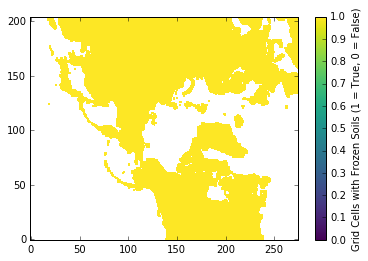

In [18]:
params['fs_active'].plot(vmin=0, 
                         vmax=1, 
                         add_labels=False, 
                         cbar_kwargs={'label':'Grid Cells with Frozen Soils (1 = True, 0 = False)'})

where is there an overstory/canopy? 

Veg classes 1-5 have overstory everywhere, 6-12 have overstory nowhere. 

look at number of active veg types (Nveg in parameter files)

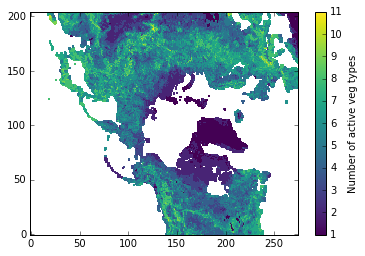

In [19]:
(params['Nveg']+1).plot(add_labels=False, cbar_kwargs={'label':'Number of active veg types'})

look at avg T 

[None, None, None, None, None, None, None]

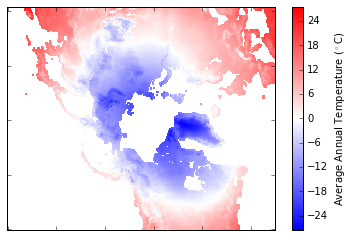

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))
params['avg_T'].plot(cmap='bwr', add_labels=False, 
                     cbar_kwargs={'label':'Average Annual Temperature ($^\circ$C)'})
plt.setp(axes.get_xticklabels(), visible=False)
plt.setp(axes.get_yticklabels(), visible=False)

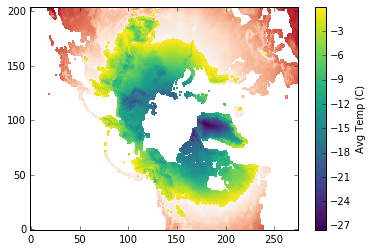

In [10]:
params['avg_T'].plot(add_labels=False, add_colorbar=False)
params['avg_T'].where(params['avg_T'] < 0).plot(cmap='viridis', add_labels=False, 
                                                cbar_kwargs={'label':'Avg Temp (C)'})

histogram of timings 

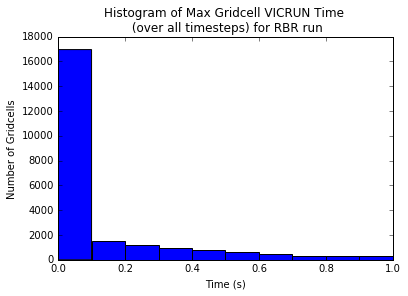

In [21]:
(rbr[var]/np.timedelta64(1,'s')).max(axis=0).plot.hist(range=(0,1))
plt.xlabel('Time (s)')
plt.ylabel('Number of Gridcells')
plt.title('Histogram of Max Gridcell VICRUN Time \n (over all timesteps) for RBR run')

Number of times our max time in vic run exceeds 0.5 s

In [22]:
((rbr[var]/np.timedelta64(1,'s')).max(axis=0) > 2).sum()

<xarray.DataArray 'OUT_TIME_VICRUN_WALL' ()>
array(813)

And what does this look like spatially? 

## set threshold for plotting to be gridcells with max runtime at one timestep > 6s##

In [23]:
rbr_max = ((rbr[var]/np.timedelta64(1,'s')).max(axis=0))
max_run_times_thres_10 = rbr_max.values[rbr_max.values > 6]
inds = np.nonzero(rbr_max.values > 6)

ni values: 75, 86

nj values: 125, 140

function for generating n distinct colors 

In [103]:
import random

def get_random_color(pastel_factor = 0.5):
    return [(x+pastel_factor)/(1.0+pastel_factor) for x in [random.uniform(0,1.0) for i in [1,2,3]]]

def color_distance(c1,c2):
    return sum([abs(x[0]-x[1]) for x in zip(c1,c2)])

def generate_new_color(existing_colors,pastel_factor = 0.5):
    max_distance = None
    best_color = None
    for i in range(0,100):
        color = get_random_color(pastel_factor = pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color,c) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color


how to select certain points 

In [90]:
max_points = (rbr[var]/np.timedelta64(1,'s')).sel_points(nj=[140], ni=[86])

## plot gridcells with runtime > 6s using lats/lons for legend##

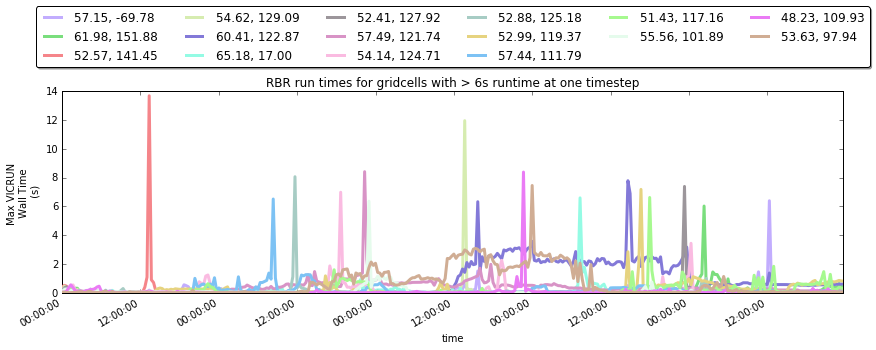

In [141]:
fig, axes = plt.subplots(1,1, figsize=(14,4))

lw = 3.0
colors = []
a = 0.8

for i in range(0,len(inds[0])):
  colors.append(generate_new_color(colors,pastel_factor = 0.9))

for i in range(len(inds[0])):
    label = "%.2f, %.2f" % (rbr.yc[inds[0][i], inds[1][i]].values, rbr.xc[inds[0][i], inds[1][i]].values)
    (rbr[var]/np.timedelta64(1,'s')).sel_points(nj=[inds[0][i]], ni=[inds[1][i]]).plot(color=colors[i], 
                                                                                       linewidth=lw, 
                                                                                       label=label,
                                                                                       zorder=5)
axes.set_ylabel('Max VICRUN \n Wall Time \n (s)')
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
            ncol=6, fancybox=True, shadow=True)
axes.set_title('RBR run times for gridcells with > 6s runtime at one timestep')

## plot gridcells with runtime > 6s using indices for legend##

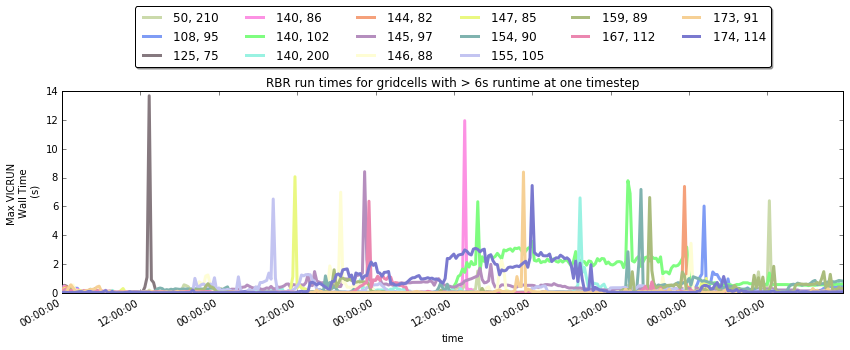

In [142]:
fig, axes = plt.subplots(1,1, figsize=(14,4))

lw = 3.0
colors = []
a = 0.8

for i in range(0,len(inds[0])):
  colors.append(generate_new_color(colors,pastel_factor = 0.9))

for i in range(len(inds[0])):
    label = "%.0f, %.0f" % (inds[0][i], inds[1][i])
    (rbr[var]/np.timedelta64(1,'s')).sel_points(nj=[inds[0][i]], ni=[inds[1][i]]).plot(color=colors[i], 
                                                                                       linewidth=lw, 
                                                                                       label=label,
                                                                                       zorder=5)
axes.set_ylabel('Max VICRUN \n Wall Time \n (s)')
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
            ncol=6, fancybox=True, shadow=True)
axes.set_title('RBR run times for gridcells with > 6s runtime at one timestep')

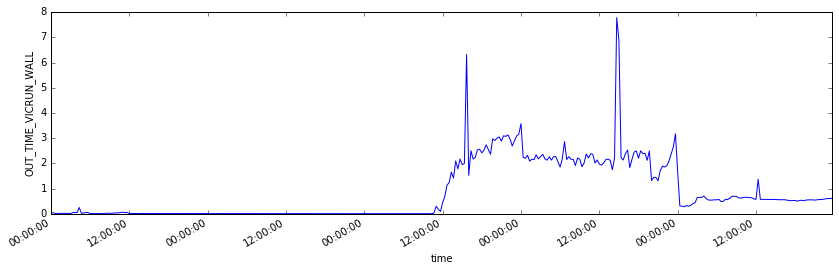

In [121]:
fig, axes = plt.subplots(1,1, figsize=(14,4))
max_points = (rbr[var]/np.timedelta64(1,'s')).sel_points(nj=[140], ni=[102]).plot()

97.94258041805222
53.632800640445325


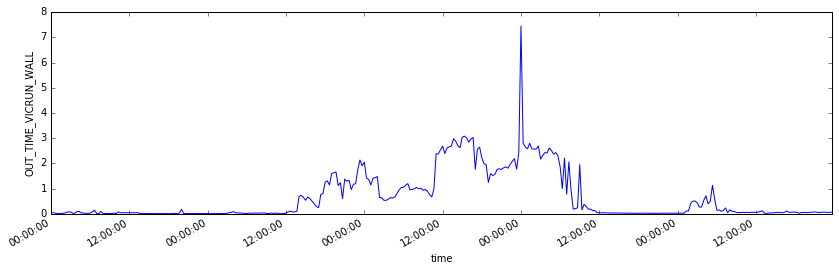

In [129]:
fig, axes = plt.subplots(1,1, figsize=(14,4))
max_points = (rbr[var]/np.timedelta64(1,'s')).sel_points(nj=[174], ni=[114]).plot()
print(rbr.xc[174, 114].values)
print(rbr.yc[174, 114].values)

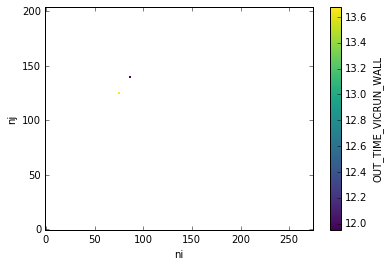

In [86]:
rbr_max.where(rbr_max > 10).plot()

In [81]:
print(rbr.xc[125, 140])
print(rbr.yc[125, 140])

<xarray.DataArray 'xc' ()>
array(105.85497964875154)
Attributes:
    long_name:      longitude
    units:          degrees_east
    standard_name:  longitude
<xarray.DataArray 'yc' ()>
array(77.34949433489939)
Attributes:
    long_name:      latitude
    units:          degrees_north
    standard_name:  latitude


same histogram as above but with CPUs instead of walltime

(array([ 17593.,   1963.,   1415.,    977.,    654.,    473.,    416.,
           387.,    323.,    335.]),
 array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
         1.35,  1.5 ]),
 <a list of 10 Patch objects>)

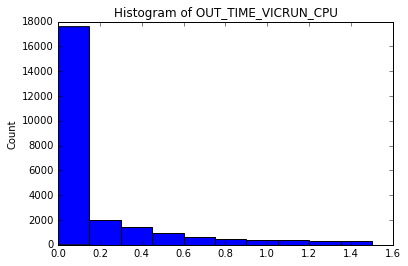

In [27]:
(rbr['OUT_TIME_VICRUN_CPU']/np.timedelta64(1,'s')).max(axis=0).plot.hist(range=(0,1.5))

look at veg types and vic run timing

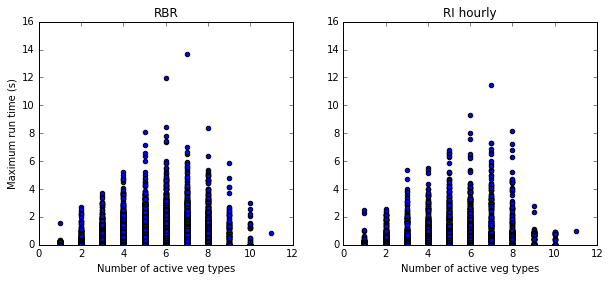

In [28]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
nveg = params.Nveg

axes[0].scatter((nveg.values + 1).flat, max_runtime_rbr.values.flat)
axes[0].set_xlabel('Number of active veg types')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,12])
axes[0].set_ylim([0,16])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
axes[1].scatter((nveg.values + 1).flat, max_runtime_ri_reg.values.flat)
axes[1].set_xlabel('Number of active veg types')
axes[1].set_xlim([0,12])
axes[1].set_ylim([0,16])
axes[1].set_title('RI hourly')

of these max run time and high veg type gridcells, how many in the frozen soil zone? 

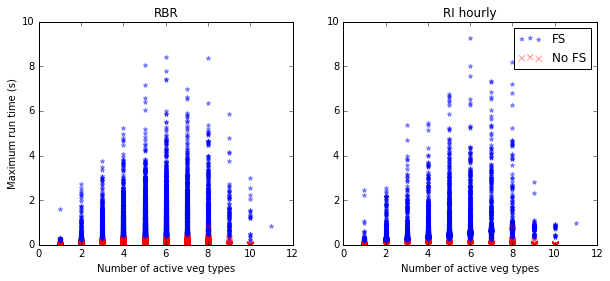

In [29]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

a = 0.4
fs = 20.0
nofs = 40.0

max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_rbr = max_runtime_rbr.where(params['avg_T'] < 0)
nofs_max_runtime_rbr = max_runtime_rbr.where(params['avg_T'] > 0)
axes[0].scatter((nveg.values + 1).flat, fs_max_runtime_rbr.values.flat, color='b', marker='*', alpha=a, s=fs)
axes[0].scatter((nveg.values + 1).flat, nofs_max_runtime_rbr.values.flat, color='r', marker='x', alpha=a, s=nofs)
axes[0].set_xlabel('Number of active veg types')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,12])
axes[0].set_ylim([0,10])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_ri_reg = max_runtime_ri_reg.where(params['avg_T'] < 0)
nofs_max_runtime_ri_reg = max_runtime_ri_reg.where(params['avg_T'] > 0)
axes[1].scatter((nveg.values + 1).flat, fs_max_runtime_ri_reg.values.flat, color='b', marker='*', alpha=a, s=fs, label="FS")
axes[1].scatter((nveg.values + 1).flat, nofs_max_runtime_ri_reg.values.flat, color='r', marker='x', alpha=a, s=nofs, label="No FS")
axes[1].set_xlabel('Number of active veg types')
axes[1].set_xlim([0,12])
axes[1].set_ylim([0,10])
axes[1].set_title('RI hourly')
axes[1].legend()

and how many of them have an overstory? 

In [7]:
u = params.Cv.groupby(params.veg_class).where(params.Cv > 0)

In [31]:
sum_canopy_cells = (u.sel(veg_class=1).fillna(0.0) + u.sel(veg_class=2).fillna(0.0) + u.sel(veg_class=3).fillna(0.0) + 
u.sel(veg_class=4).fillna(0.0) + u.sel(veg_class=5).fillna(0.0))
sum_canopy_cells_mask = sum_canopy_cells.where(sum_canopy_cells > 0)

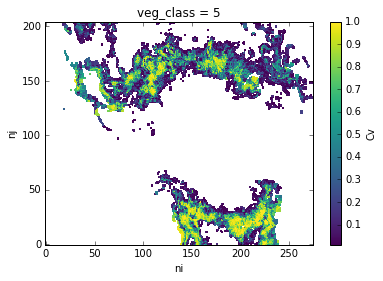

In [32]:
sum_canopy_cells_mask.plot()

how many of the active vegetation types have an overstory? 

[None, None, None, None, None, None, None]

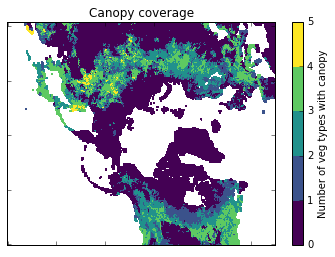

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))

arr_ones = xr.full_like(u.sel(veg_class=1), 1)
veg_one = arr_ones.where(u.sel(veg_class=1) > 0).fillna(0.0)
veg_two = arr_ones.where(u.sel(veg_class=2) > 0).fillna(0.0)
veg_three = arr_ones.where(u.sel(veg_class=3) > 0).fillna(0.0)
veg_four = arr_ones.where(u.sel(veg_class=4) > 0).fillna(0.0)
veg_five = arr_ones.where(u.sel(veg_class=5) > 0).fillna(0.0)
veg_canopies = (veg_one + veg_two + veg_three + veg_four + veg_five)
veg_canopies.where(params.run_cell > 0).plot(vmax=5, levels=6, cbar_kwargs={'label':'Number of veg types with canopy'}, 
                                             add_labels=False, ax=axes)
plt.title('Canopy coverage')
plt.setp(axes.get_xticklabels(), visible=False)
plt.setp(axes.get_yticklabels(), visible=False)

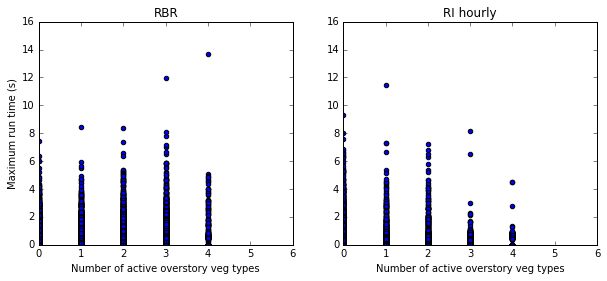

In [34]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
veg_canopies_masked = veg_canopies.where(params.run_cell > 0)

axes[0].scatter(veg_canopies_masked.values.flat, max_runtime_rbr.values.flat)
axes[0].set_xlabel('Number of active overstory veg types')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,6])
axes[0].set_ylim([0,16])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
axes[1].scatter(veg_canopies_masked.values.flat, max_runtime_ri_reg.values.flat)
axes[1].set_xlabel('Number of active overstory veg types')
axes[1].set_xlim([0,6])
axes[1].set_ylim([0,16])
axes[1].set_title('RI hourly')

and of those, which ones are in the frozen soil zone? 

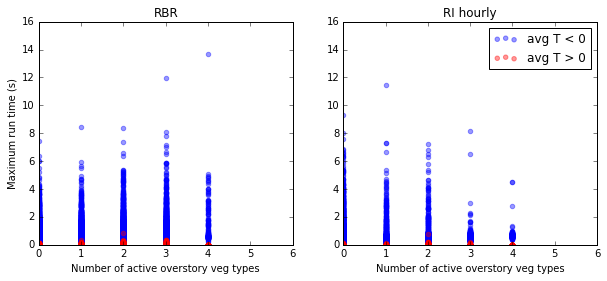

In [35]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
veg_canopies_masked = veg_canopies.where(params.run_cell > 0)

a = 0.4

fs_max_runtime_rbr = max_runtime_rbr.where(params['avg_T'] < 0)
fs_veg_canopies_masked = veg_canopies_masked.where(params['avg_T'] < 0)
no_fs_max_runtime_rbr = max_runtime_rbr.where(params['avg_T'] > 0)
no_fs_veg_canopies_masked = veg_canopies_masked.where(params['avg_T'] > 0)
axes[0].scatter(fs_veg_canopies_masked.values.flat, fs_max_runtime_rbr.values.flat, color='b', label='FS', 
                alpha=a)
axes[0].scatter(no_fs_veg_canopies_masked.values.flat, no_fs_max_runtime_rbr.values.flat, color='r', label='no FS', 
                alpha=a)
axes[0].set_xlabel('Number of active overstory veg types')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,6])
axes[0].set_ylim([0,16])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_ri_reg = max_runtime_ri_reg.where(params['avg_T'] < 0)
no_fs_max_runtime_ri_reg = max_runtime_ri_reg.where(params['avg_T'] > 0)
axes[1].scatter(fs_veg_canopies_masked.values.flat, fs_max_runtime_ri_reg.values.flat, color='b', label='avg T < 0', 
                alpha=a)
axes[1].scatter(no_fs_veg_canopies_masked.values.flat, no_fs_max_runtime_ri_reg.values.flat, color='r', label='avg T > 0', 
                alpha=a)
axes[1].set_xlabel('Number of active overstory veg types')
axes[1].set_xlim([0,6])
axes[1].set_ylim([0,16])
axes[1].set_title('RI hourly')
axes[1].legend()

what about this same plot, but maximum time for a single time step for each grid cell? 

In [36]:
max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s'))
len(max_runtime_rbr.time)

360

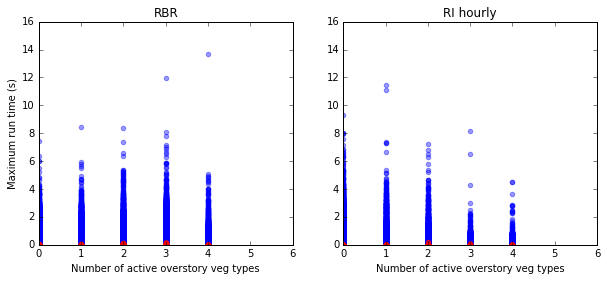

In [37]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
max_runtime_rbr_all = (rbr[var]/np.timedelta64(1,'s'))
max_runtime_ri_reg_all = (ri_reg[var]/np.timedelta64(1,'s'))
fs_veg_canopies_masked = veg_canopies_masked.where(params['avg_T'] < 0)
no_fs_veg_canopies_masked = veg_canopies_masked.where(params['avg_T'] > 0)

a = 0.4

for timestep in range(0,len(max_runtime_rbr_all.time)):
    fs_max_runtime_rbr = max_runtime_rbr_all.isel(time=timestep).where(params['avg_T'] < 0)
    no_fs_max_runtime_rbr = max_runtime_rbr_all.isel(time=timestep).where(params['avg_T'] > 0)
    axes[0].scatter(fs_veg_canopies_masked.values.flat, fs_max_runtime_rbr.values.flat, color='b', label='FS', 
                    alpha=a)
    axes[0].scatter(no_fs_veg_canopies_masked.values.flat, no_fs_max_runtime_rbr.values.flat, color='r', label='no FS', 
                    alpha=a)
axes[0].set_xlabel('Number of active overstory veg types')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,6])
axes[0].set_ylim([0,16])
axes[0].set_title('RBR')

for timestep in range(0,len(max_runtime_ri_reg_all)):
    fs_max_runtime_ri_reg = max_runtime_ri_reg_all.isel(time=timestep).where(params['avg_T'] < 0)
    no_fs_max_runtime_ri_reg = max_runtime_ri_reg_all.isel(time=timestep).where(params['avg_T'] > 0)
    axes[1].scatter(fs_veg_canopies_masked.values.flat, fs_max_runtime_ri_reg.values.flat, color='b', 
                    alpha=a)
    axes[1].scatter(no_fs_veg_canopies_masked.values.flat, no_fs_max_runtime_ri_reg.values.flat, color='r', 
                    alpha=a)
axes[1].set_xlabel('Number of active overstory veg types')
axes[1].set_xlim([0,6])
axes[1].set_ylim([0,16])
axes[1].set_title('RI hourly')

In [38]:
veg_canopies.where(params.run_cell > 0).max()

<xarray.DataArray ()>
array(4.0)
Coordinates:
    veg_class  int32 1

look at overlap of frozen soils and overstory areas 

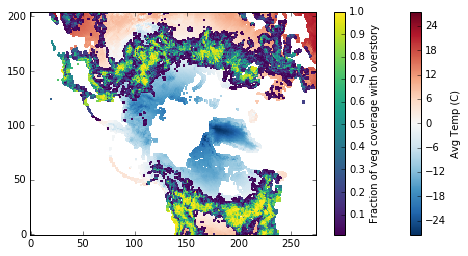

In [39]:
fig, axes = plt.subplots(1,1, figsize=(8,4))
params['avg_T'].plot(add_labels=False, cbar_kwargs={'label':'Avg Temp (C)'}, )
sum_canopy_cells.where(sum_canopy_cells > 0).plot(cmap='viridis', add_labels=False, 
                                                 cbar_kwargs={'label':'Fraction of veg coverage with overstory'})

look at overlap between maximum run time and overstory grid cells (same scatter plot as above but with overstory gridcells plotted separately instead of frozen soils ones)

NOTE: this is a canopy/no canopy plot. Below is a % canopy one. 

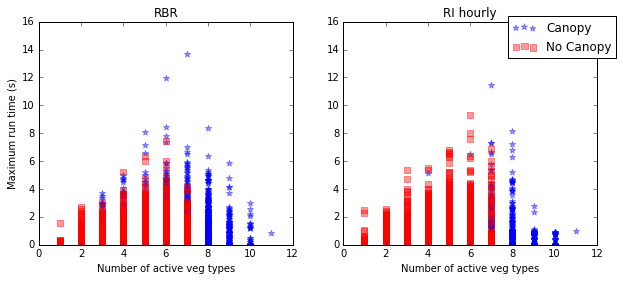

In [40]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

a = 0.4
fs = 40.0
nofs = 40.0

max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_rbr = max_runtime_rbr.where(sum_canopy_cells > 0)
nofs_max_runtime_rbr = max_runtime_rbr.where(sum_canopy_cells <= 0)
axes[0].scatter((nveg.values + 1).flat, fs_max_runtime_rbr.values.flat, color='b', marker='*', alpha=a, s=fs)
axes[0].scatter((nveg.values + 1).flat, nofs_max_runtime_rbr.values.flat, color='r', marker='s', alpha=a, s=nofs)
axes[0].set_xlabel('Number of active veg types')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,12])
axes[0].set_ylim([0,16])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_ri_reg = max_runtime_ri_reg.where(sum_canopy_cells > 0)
nofs_max_runtime_ri_reg = max_runtime_ri_reg.where(sum_canopy_cells <= 0)
axes[1].scatter((nveg.values + 1).flat, fs_max_runtime_ri_reg.values.flat, color='b', marker='*', alpha=a, s=fs, label='Canopy')
axes[1].scatter((nveg.values + 1).flat, nofs_max_runtime_ri_reg.values.flat, color='r', marker='s', alpha=a, s=nofs, label='No Canopy')
axes[1].set_xlabel('Number of active veg types')
axes[1].set_xlim([0,12])
axes[1].set_ylim([0,16])
axes[1].set_title('RI hourly')
axes[1].legend(bbox_to_anchor=(1.1, 1.05))

look at overlap between maximum run time and overstory grid cells (same scatter plot as above but with overstory gridcells plotted separately instead of frozen soils ones)

Unlike the above figure, this is a percent canopy one (not just canopy/no canopy)

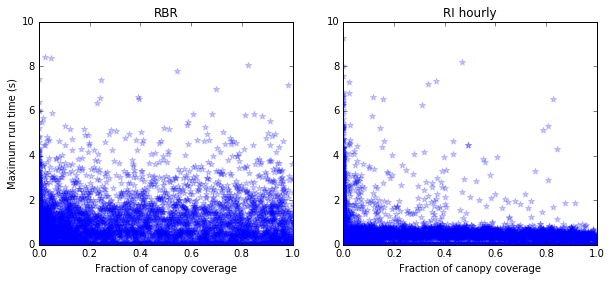

In [41]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

a = 0.2
fs = 40.0
nofs = 40.0

max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
axes[0].scatter(sum_canopy_cells.values.flat, max_runtime_rbr.values.flat, color='b', marker='*', alpha=a, s=fs)
axes[0].set_xlabel('Fraction of canopy coverage')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,1])
axes[0].set_ylim([0,10])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
axes[1].scatter(sum_canopy_cells.values.flat, max_runtime_ri_reg.values.flat, color='b', marker='*', alpha=a, s=fs)
axes[1].set_xlabel('Fraction of canopy coverage')
axes[1].set_xlim([0,1])
axes[1].set_ylim([0,10])
axes[1].set_title('RI hourly')

what if we mask out the frozen soils gridcells and just scatter those? 

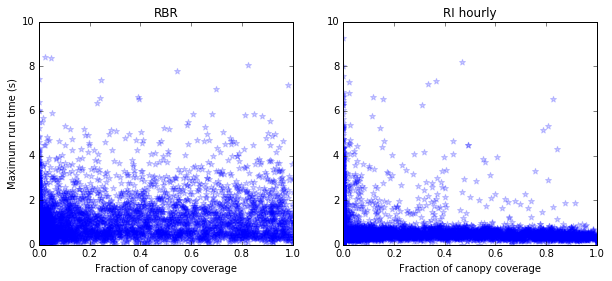

In [42]:
fs_max_runtime_ri_reg = max_runtime_ri_reg.where(params['avg_T'] < 0)

fig, axes = plt.subplots(1,2, figsize=(10,4))

a = 0.2
fs = 40.0
nofs = 40.0

max_runtime_rbr = (rbr[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_rbr = max_runtime_rbr.where(params['avg_T'] < 0)
fs_canopy = sum_canopy_cells.where(params['avg_T'] < 0)
axes[0].scatter(fs_canopy.values.flat, fs_max_runtime_rbr.values.flat, color='b', marker='*', alpha=a, s=fs)
axes[0].set_xlabel('Fraction of canopy coverage')
axes[0].set_ylabel('Maximum run time (s)')
axes[0].set_xlim([0,1])
axes[0].set_ylim([0,10])
axes[0].set_title('RBR')

max_runtime_ri_reg = (ri_reg[var]/np.timedelta64(1,'s')).max(axis=0)
fs_max_runtime_ri_reg = max_runtime_ri_reg.where(params['avg_T'] < 0)
axes[1].scatter(fs_canopy.values.flat, fs_max_runtime_ri_reg.values.flat, color='b', marker='*', alpha=a, s=fs)
axes[1].set_xlabel('Fraction of canopy coverage')
axes[1].set_xlim([0,1])
axes[1].set_ylim([0,10])
axes[1].set_title('RI hourly')

In [43]:
xr.version

<module 'xarray.version' from '//anaconda/envs/vic_test_env/lib/python3.5/site-packages/xarray/version.py'>